# Tarea 3 - Introducción a la Biomecánica
### Pregunta 3

In [1]:
import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt

In [2]:
# Definición de parámetros

global mu, lam2, phi, c, cd, beta, d

mu = 280.8
lam2 = 421.2
phi = 0.99

c = 286.61
cd = 0.008238
beta = 1.1738
d = 6

lam_array = np.linspace(0.5, 2, 100)

### Caso CM1

In [3]:
# Función sigma_11 

def s11cm1(lam, lam_t):
    return (2 / (lam * lam_t ** 2)) * (  
            (-c * (lam ** 2 * lam_t ** 4) ** (-beta)) +
            lam ** 2 * (c + cd * d * (2 * lam_t ** 2 + lam ** 2 - 3) ** (d - 1))
    )

In [4]:
# Función sigma_22

def s22cm1(lam, lam_t):
    return (2 / (lam * lam_t ** 2)) * (  
            (-c * (lam ** 2 * lam_t ** 4) ** (-beta)) +
            lam_t ** 2 * (c + cd * d * (2 * lam_t ** 2 + lam ** 2 - 3) ** (d - 1))
    )

In [5]:
# Derivada función sigma_22

def ds22cm1(lam, lam_t):
    return (4 / (lam * lam_t ** 3)) * (  
            (c * (1 + 2 * beta) * (lam ** 2 * lam_t ** 4) ** (-beta)) +
            lam_t ** 4 * 2 * cd * d * (d - 1) * (2 * lam_t ** 2 + lam ** 2 - 3) ** (d - 2)
    )

In [6]:
g_cm1_array = []
for lam in lam_array:
    def g_cm1(lam_t):
        return s22cm1(lam, lam_t)
    g_cm1_array.append(g_cm1)

In [7]:
dg_cm1_array = []
for lam in lam_array:
    def dg_cm1(lam_t):
        return ds22cm1(lam, lam_t)
    dg_cm1_array.append(dg_cm1)

In [8]:
cm1_lam_t_array = []
for i, lam in enumerate(lam_array):
    cm1_lam_t = newton(g_cm1_array[i], 0.5, maxiter = 50)
    cm1_lam_t_array.append(cm1_lam_t)

In [9]:
cm1_lam_t_array = []
for i, lam in enumerate(lam_array):
    cm1_lam_t = newton(g_cm1_array[i], fprime=dg_cm1_array[i], x0=0.5, maxiter=50)
    cm1_lam_t_array.append(cm1_lam_t)

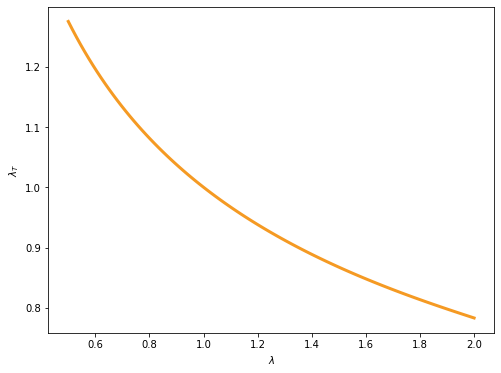

In [10]:
# Plot método de Newton

plt.figure(figsize=(8, 6))
plt.ylabel(r'$\lambda_T$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, cm1_lam_t_array, color = '#F59A23', linewidth = 3)
plt.show()

In [11]:
cm1_array = []

for i in range(len(lam_array)):
    cm1 = s11cm1(lam_array[i], cm1_lam_t_array[i])
    cm1_array.append(cm1)

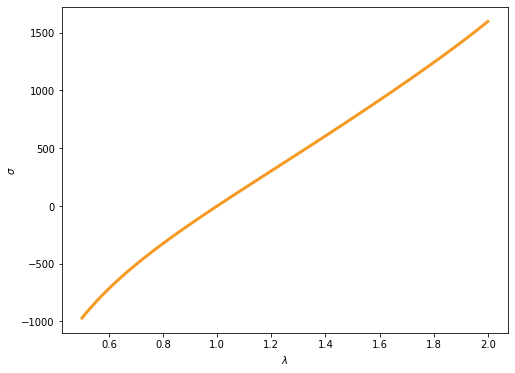

In [12]:
# Plot tensión vs. deformación

plt.figure(figsize=(8, 6))
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, cm1_array, color = '#F59A23', linewidth = 3)
plt.show()

### Caso CM2

In [13]:
# Función sigma_11

def s11cm2(lam, lam_t):
    return (1 / 2) * (
        lam * lam2 * lam_t ** 2 + 
        (2 * mu) / (lam_t ** 2) +
        (lam2 + 2 * mu) / (phi + lam * lam_t ** 2 - 1)
    )

In [14]:
# Función sigma_22

def s22cm2(lam, lam_t):
    return (1 / 2) * lam * lam2 * lam_t ** 2 + \
        (mu) / (lam * lam_t) + \
        (lam2 / 2 + mu) / (phi + lam * lam_t ** 2 - 1)

In [15]:
# Deridada función sigma_22

def ds22cm2(lam, lam_t):
    return (1 / ((lam * lam_t ** 2) * (phi + lam * lam_t ** 2 - 1))) * (
        lam ** 4 * lam2 * lam_t ** 7 + \
        2 * lam ** 3 * lam2 * lam_t ** 5 * (phi - 1) - \
        2 * lam * lam_t ** 2 * mu * (phi - 1) - mu * (phi - 1) ** 2 - \
        lam ** 2 * lam_t ** 3 * ((lam_t + 2) * mu - lam2 * (phi - 2) * phi)
    )

In [16]:
g_cm2_array = []
for lam in lam_array:
    def g_cm2(lam_t):
        return s22cm2(lam, lam_t)
    g_cm2_array.append(g_cm2)

In [17]:
dg_cm2_array = []
for lam in lam_array:
    def dg_cm2(lam_t):
        return ds22cm2(lam, lam_t)
    dg_cm2_array.append(dg_cm2)

In [18]:
cm2_lam_t_array = []
for i, lam in enumerate(lam_array):
    cm2_lam_t = newton(dg_cm2_array[i], 0.5, maxiter = 50)
    cm2_lam_t_array.append(cm2_lam_t)

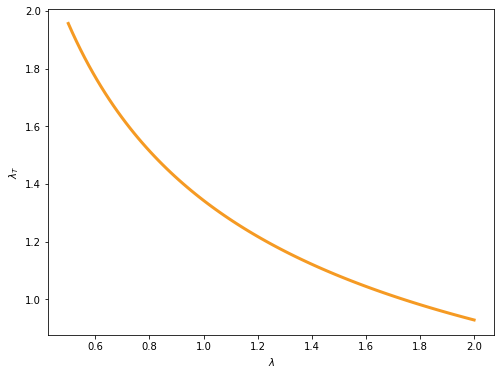

In [19]:
# Plot método de Newton

plt.figure(figsize=(8, 6))
plt.ylabel(r'$\lambda_T$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, cm2_lam_t_array, color = '#F59A23', linewidth = 3)
plt.show()

In [20]:
cm2_array = []

for i in range(len(lam_array)):
    cm2 = s11cm1(lam_array[i], cm2_lam_t_array[i])
    cm2_array.append(cm2)

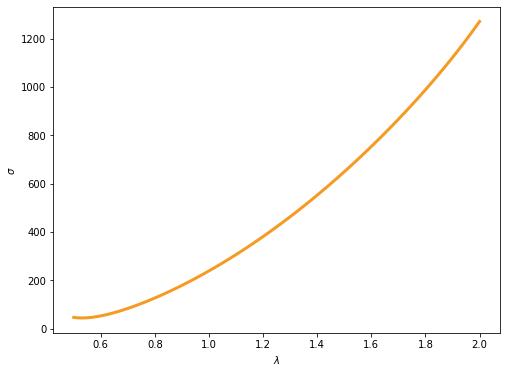

In [21]:
# Plot tensión vs. deformación

plt.figure(figsize=(8, 6))
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, cm2_array, color = '#F59A23', linewidth = 3)
plt.show()

#### Hecho con :heart: por Iván Vergara Lam